## Author @ Mahmoud Saeed

# Load Libraries

In [1]:
# processing
import pandas as pd
import numpy as np
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
import csv
file = open('globalterrorismdb_0718dist.csv')
csvFile = csv.reader(file)

In [3]:
data = []
columns = next(csvFile)
for row in csvFile:
    data.append(row)
    
file.close()

In [4]:
data = pd.DataFrame(data , columns = columns)

In [5]:
data.shape

(181691, 135)

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
data.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,,Santo Domingo,...,,1,0,0,0,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,...,,0,0,0,1,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,,1,0,0,0,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,...,Unknown Explosive Type,,,1,0,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,,,,1,0,PGIS,-9,-9,1,1


# Preprocessing

In [5]:
None_columns = [i for i in data.columns if sum(data[i] == '') > (len(data)/4)]

In [6]:
# i will delete all these columns
data.drop(None_columns , inplace = True , axis = 1)
data.drop(['eventid'] , axis = 1 , inplace = True)

In [8]:
len(data.columns)

47

In [8]:
# see the sumof duplicated rows in our data
data.duplicated().sum()

9862

In [7]:
#remove duplicates from data
data.drop_duplicates(inplace = True)

In [84]:
data.nunique()

iyear                   47
imonth                  13
iday                    32
extended                 2
country                205
country_txt            205
region                  12
region_txt              12
provstate             2856
city                 36675
latitude             48323
longitude            48040
specificity              6
vicinity                 3
summary             112493
crit1                    2
crit2                    2
crit3                    2
doubtterr                4
multiple                 3
success                  2
suicide                  2
attacktype1              9
attacktype1_txt          9
targtype1               22
targtype1_txt           22
targsubtype1           113
targsubtype1_txt       113
corp1                33242
target1              86009
natlty1                216
natlty1_txt            216
gname                 3537
guncertain1              3
individual               2
nperps                 114
nperpcap                51
c

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172580 entries, 0 to 181690
Data columns (total 57 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   iyear             172580 non-null  object
 1   imonth            172580 non-null  object
 2   iday              172580 non-null  object
 3   extended          172580 non-null  object
 4   country           172580 non-null  object
 5   country_txt       172580 non-null  object
 6   region            172580 non-null  object
 7   region_txt        172580 non-null  object
 8   provstate         172580 non-null  object
 9   city              172580 non-null  object
 10  latitude          172580 non-null  object
 11  longitude         172580 non-null  object
 12  specificity       172580 non-null  object
 13  vicinity          172580 non-null  object
 14  summary           172580 non-null  object
 15  crit1             172580 non-null  object
 16  crit2             172580 non-null  obj

In [89]:
data['target1']

0                    Julio Guzman
1         Nadine Chaval, daughter
2                        Employee
3                    U.S. Embassy
4                  U.S. Consulate
                   ...           
181686                 Checkpoint
181687           Hmeymim Air Base
181688                     Houses
181689                     Office
181690                    Unknown
Name: target1, Length: 171829, dtype: object

In [8]:
for i in data.columns:
    data[[i]] = data[[i]].replace('',data[i].mode()[0])

In [90]:
data.iloc[0]

iyear                                      1970
imonth                                        7
iday                                          2
extended                                      0
country                                      58
country_txt                  Dominican Republic
region                                        2
region_txt          Central America & Caribbean
provstate                               Baghdad
city                              Santo Domingo
latitude                              18.456792
longitude                            -69.951164
specificity                                   1
vicinity                                      0
crit1                                         1
crit2                                         1
crit3                                         1
doubtterr                                     0
multiple                                      0
success                                       1
suicide                                 

In [9]:
# ord(data['iyear'][0][3]) >= 41
ll = []
for i in data.columns:
    j = 0
    while len(data[i][j]) == 0:
        j+=1
    if ord(data[i][j][0]) <= 57:
        ll.append(i)
#     print(ord(data[i][j][0]) > 57)

# len(data['corp1'][0]) == 0

In [10]:
data[ll] = data[ll].apply(pd.to_numeric)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171829 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             171829 non-null  int64  
 1   imonth            171829 non-null  int64  
 2   iday              171829 non-null  int64  
 3   extended          171829 non-null  int64  
 4   country           171829 non-null  int64  
 5   country_txt       171829 non-null  object 
 6   region            171829 non-null  int64  
 7   region_txt        171829 non-null  object 
 8   provstate         171829 non-null  object 
 9   city              171829 non-null  object 
 10  latitude          171829 non-null  float64
 11  longitude         171829 non-null  float64
 12  specificity       171829 non-null  int64  
 13  vicinity          171829 non-null  int64  
 14  crit1             171829 non-null  int64  
 15  crit2             171829 non-null  int64  
 16  crit3             17

In [103]:
data.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,1.718290e+05,171829.000000,171829.000000,...,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000,171829.000000
mean,2002.996677,6.470066,15.522636,0.047029,132.982483,7.221837,23.975199,-4.718813e+02,1.432296,0.069261,...,6.431347,11.506102,2.372120,3.025106,-0.596628,0.062923,-4.599451,-4.519976,0.094239,-3.981773
std,13.203107,3.391197,8.814190,0.211702,113.076693,2.910107,18.172905,2.079161e+05,0.969810,0.287744,...,2.185508,6.349095,11.520702,35.267317,3.164041,0.453456,4.543042,4.637886,0.559177,4.698000
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,...,1.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,83.000000,6.000000,12.081777,8.500260e+00,1.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2009.000000,6.000000,15.000000,0.000000,104.000000,8.000000,31.704338,4.378420e+01,1.000000,0.000000,...,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.541625,6.871033e+01,1.000000,0.000000,...,6.000000,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,...,13.000000,31.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>**There are columns that refer to the same mean so I will remove one for each of them**

In [11]:
# remove unnecessary columns
unn_col = ['country' , 'region' , 'attacktype1' , 'targtype1' , 'targsubtype1' , 'natlty1' , 'weaptype1']
data.drop(unn_col ,axis = 1 , inplace = True )

# EDA & Insights

 > **I will make exploratory data analysis to fully understand and get the insights from data**
 

In [114]:
# get only numeric data 
numeric = [i for i in data.columns if (data[i].dtype in ['int64' , 'float64']) and (data[i].nunique() > 5)  ]
# get categoral data
# categoral = [i for i in data.columns if (data[i].dtype == 'object') and (data[i].nunique() < 50)]

In [115]:

def singleplot():
    for i in numeric:
        plt.subplots(1,2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(data[i])
        plt.subplot(1,2,2)
        sns.boxplot(data[i]);
        yield()
# numeric

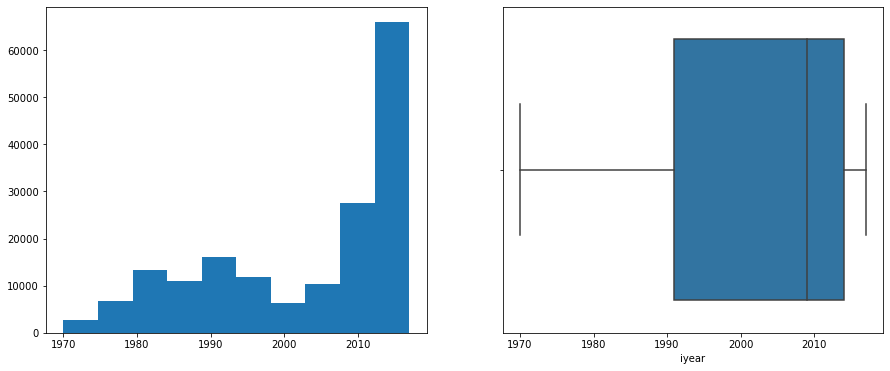

In [116]:
myplot = singleplot()
next(myplot);

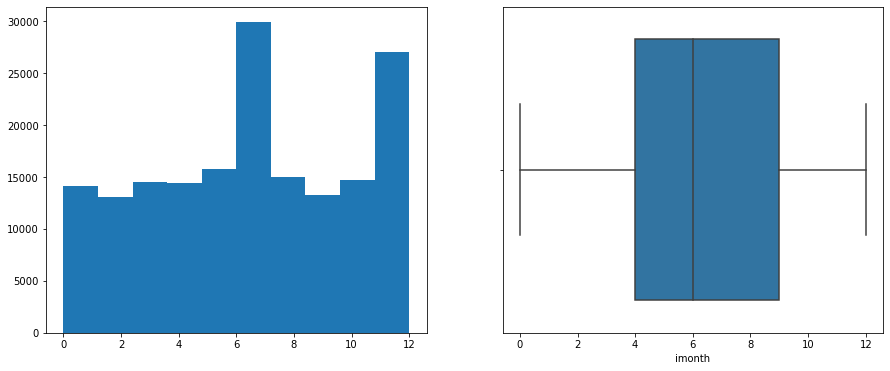

In [117]:
next(myplot);

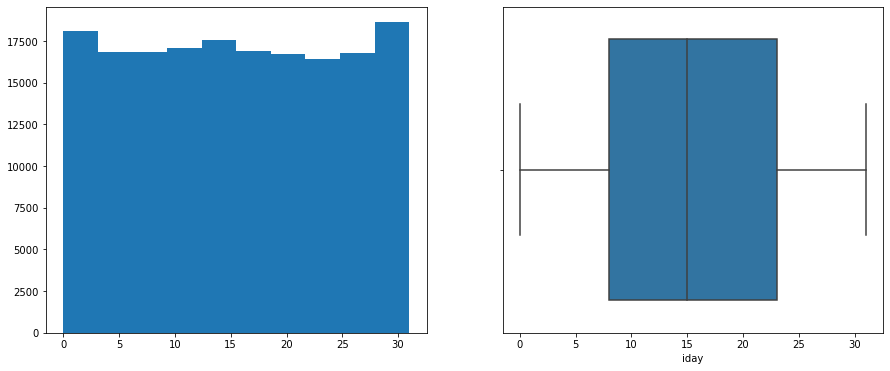

In [118]:
next(myplot);

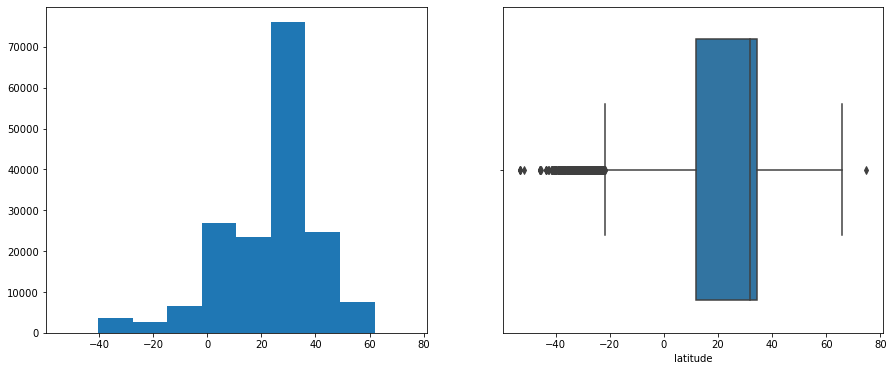

In [119]:
next(myplot);

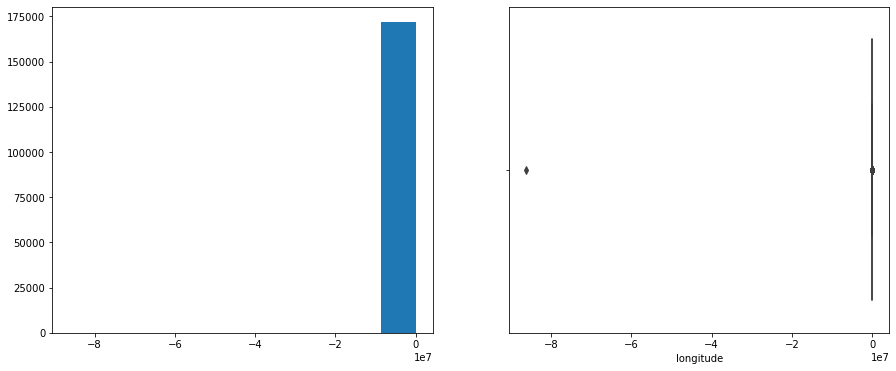

In [120]:
next(myplot);

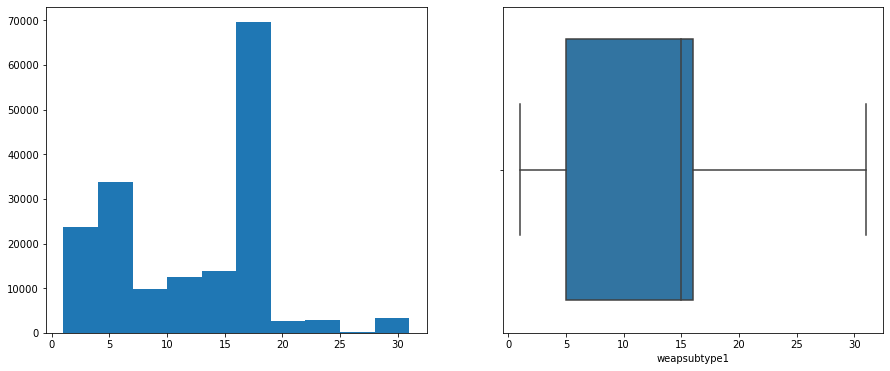

In [121]:
next(myplot);

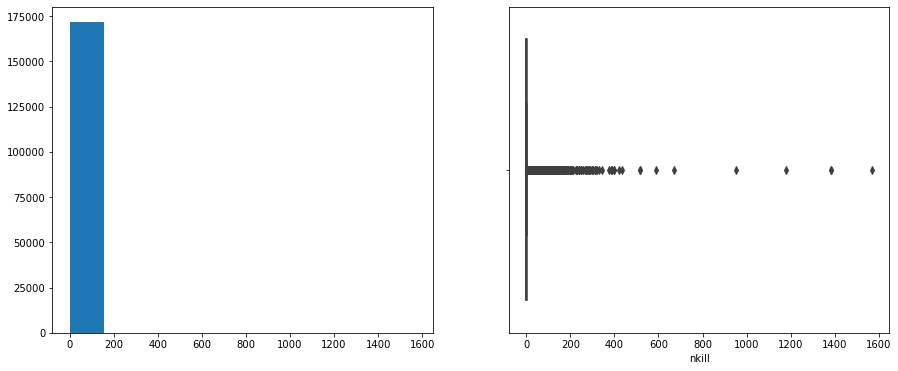

In [122]:
next(myplot);

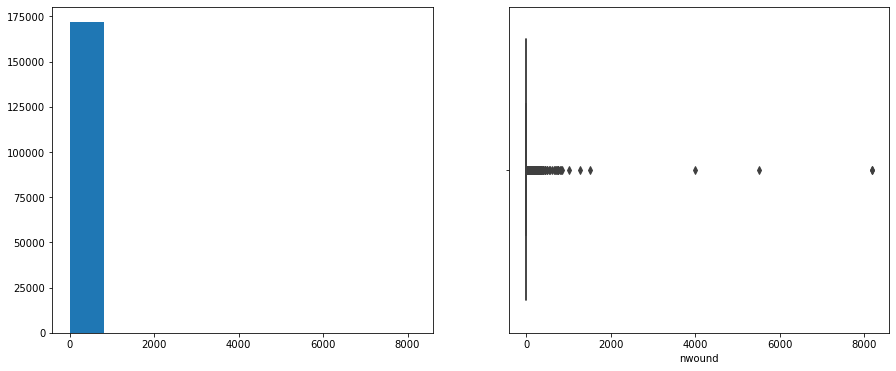

In [123]:
next(myplot);

In [131]:
def singleplot():
    for i in data.columns:
        if (i not in numeric) and (data[i].nunique() < 50):
            plt.figure(figsize = [16,6])
            sns.countplot(data = data , x = i , order =  data[i].value_counts(ascending = False).index);
            plt.xticks(rotation = 90);
            yield()
#categoral

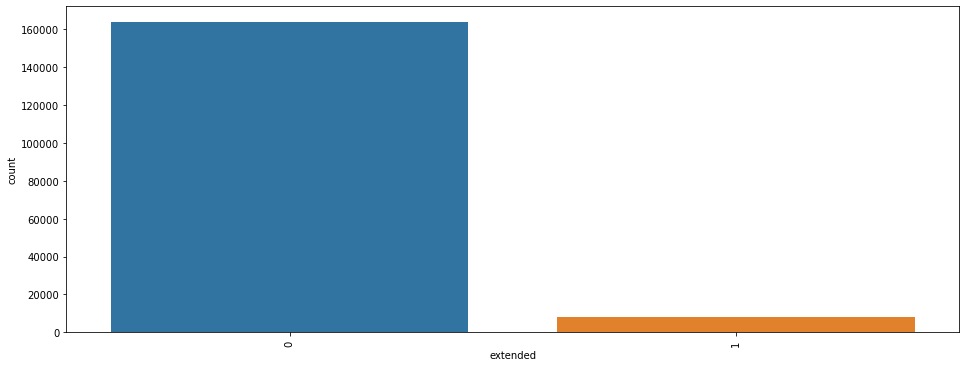

In [132]:
myplot = singleplot()
next(myplot);

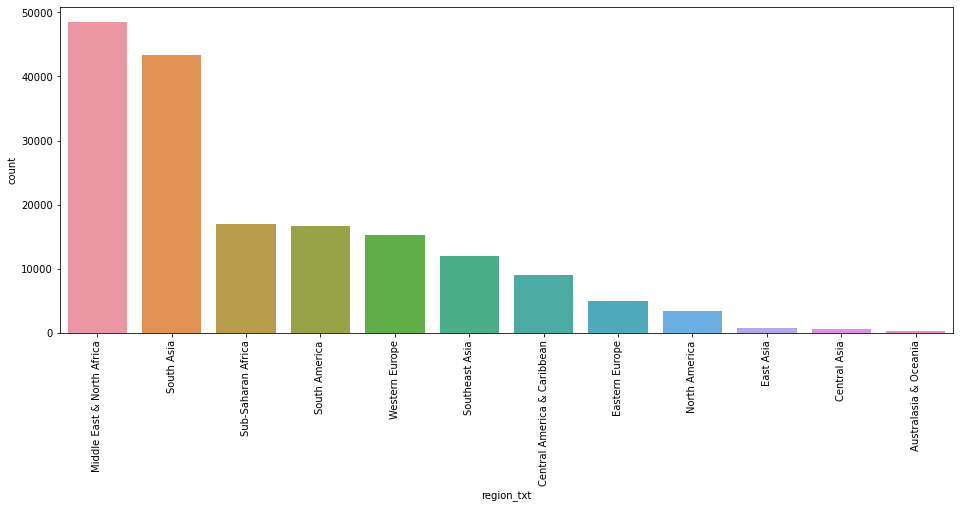

In [133]:
next(myplot);

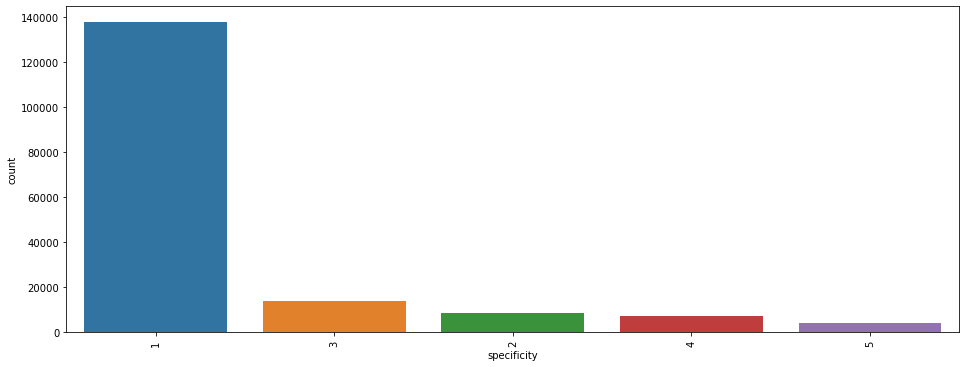

In [134]:
next(myplot);

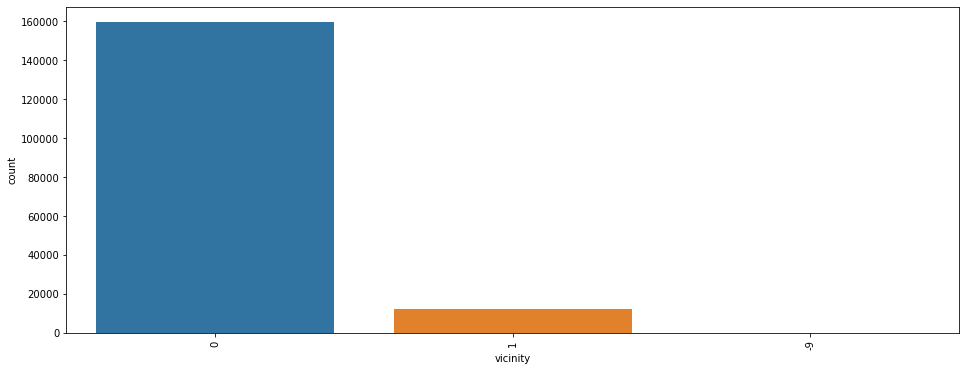

In [135]:
next(myplot);

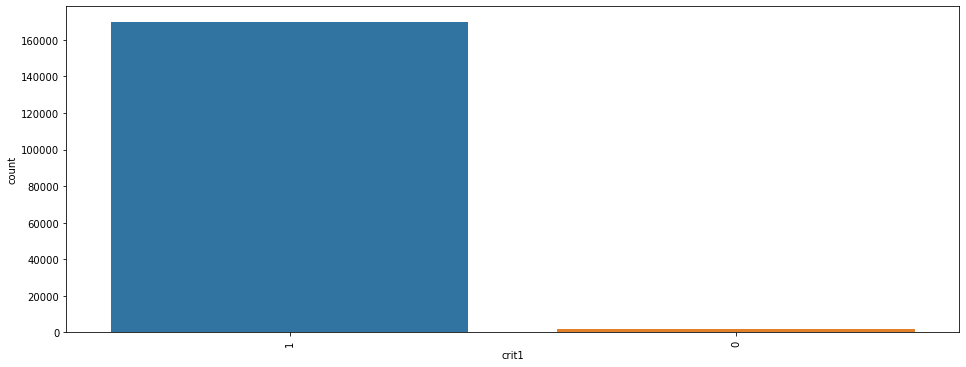

In [136]:
next(myplot);

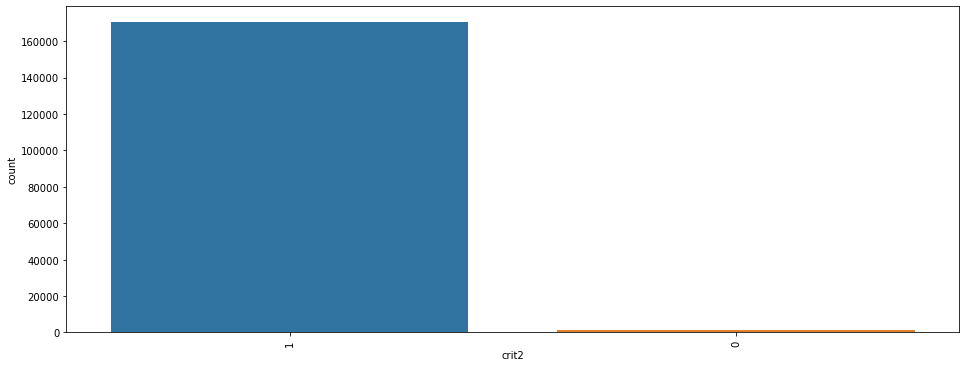

In [137]:
next(myplot);

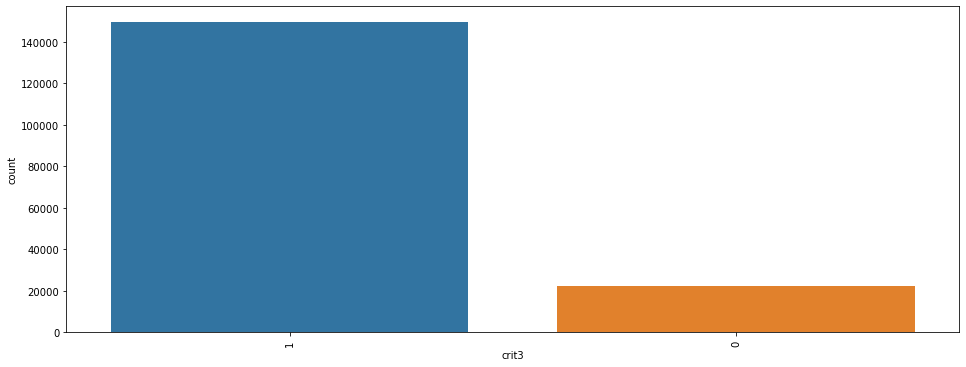

In [138]:
next(myplot);

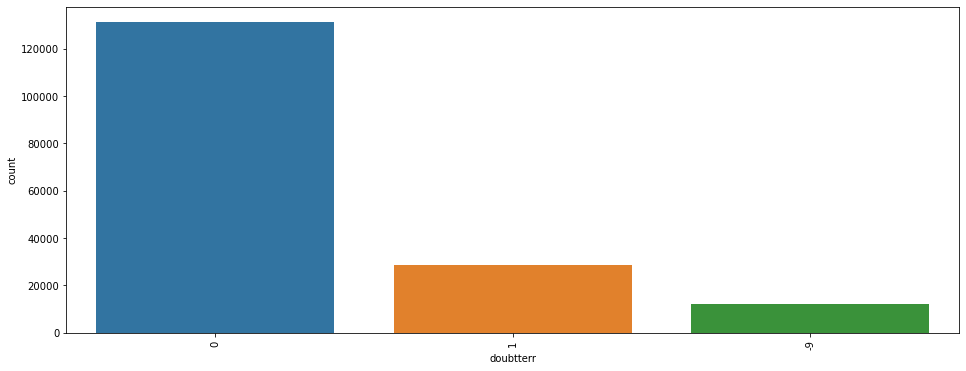

In [139]:
next(myplot);

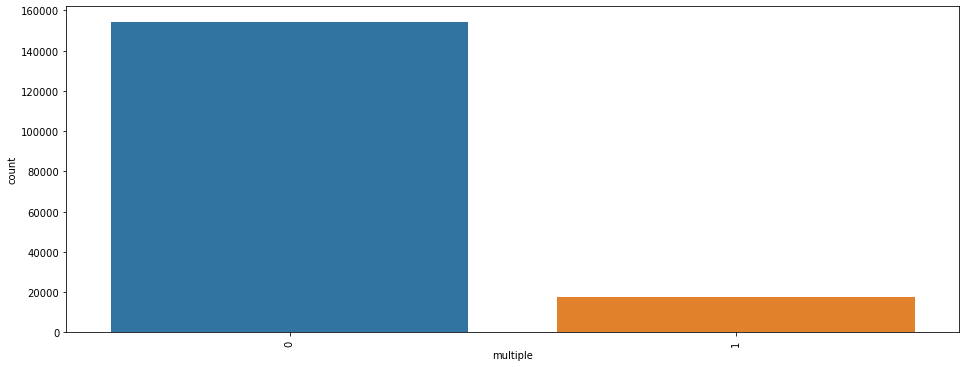

In [140]:
next(myplot);

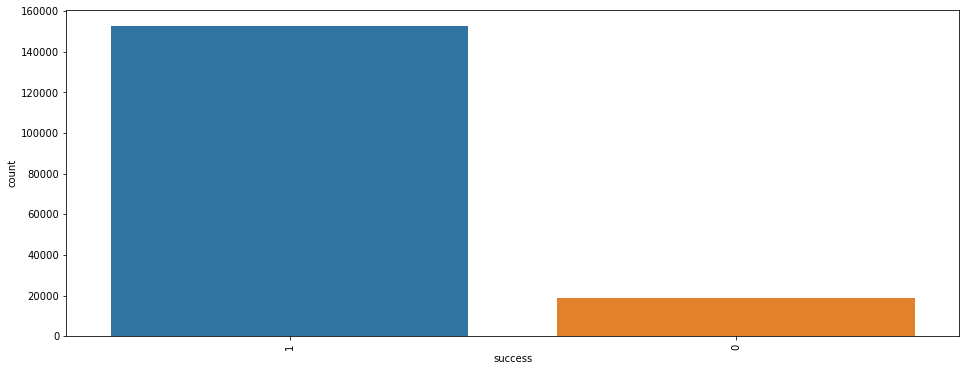

In [141]:
next(myplot);

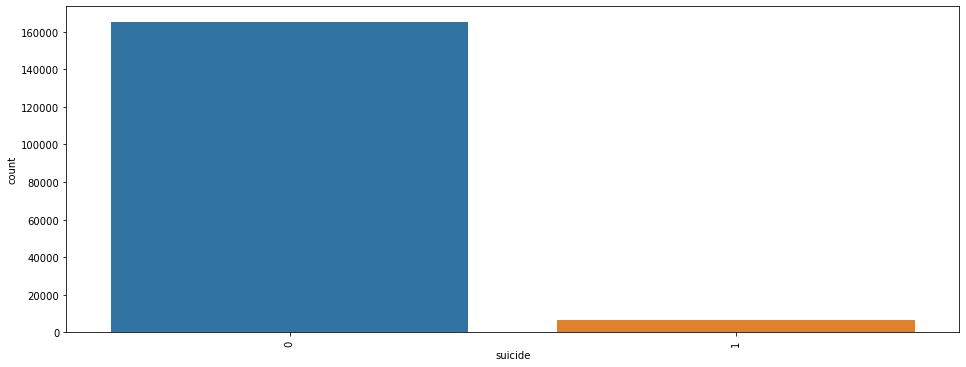

In [142]:
next(myplot);

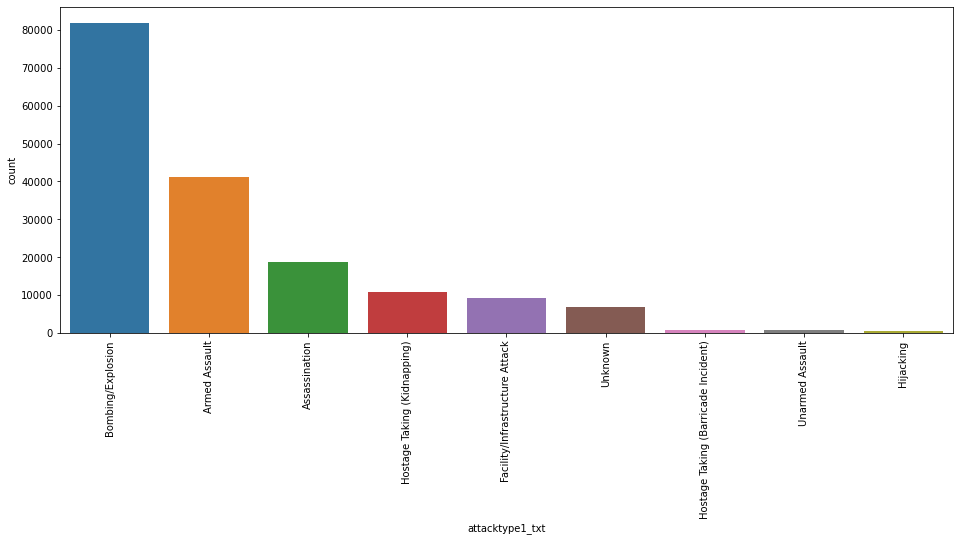

In [143]:
next(myplot);

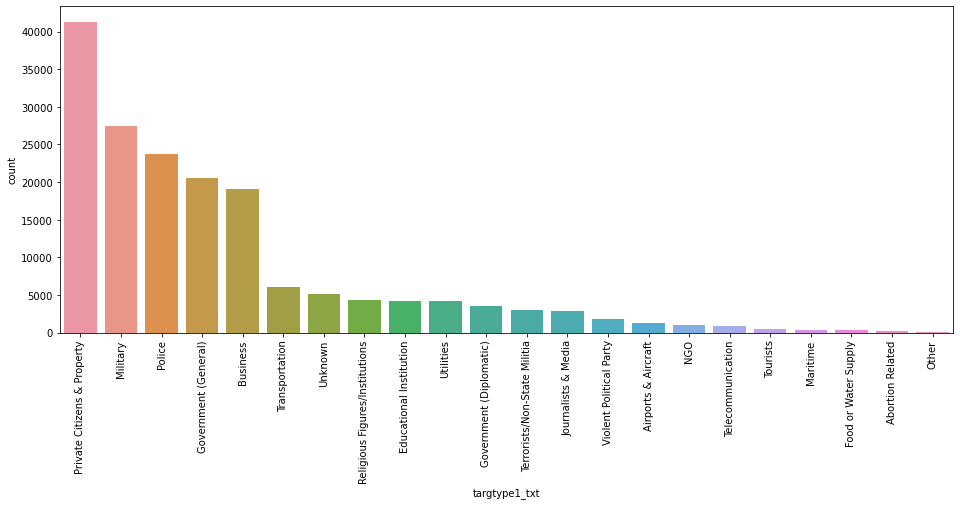

In [144]:
next(myplot);

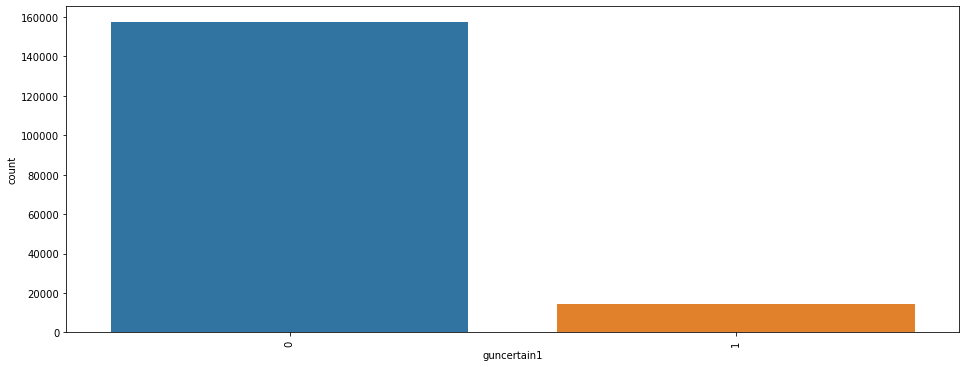

In [145]:
next(myplot);

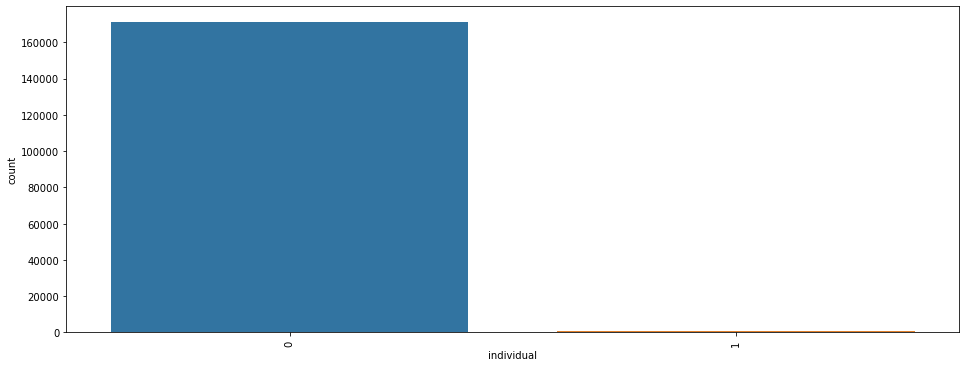

In [146]:
next(myplot);

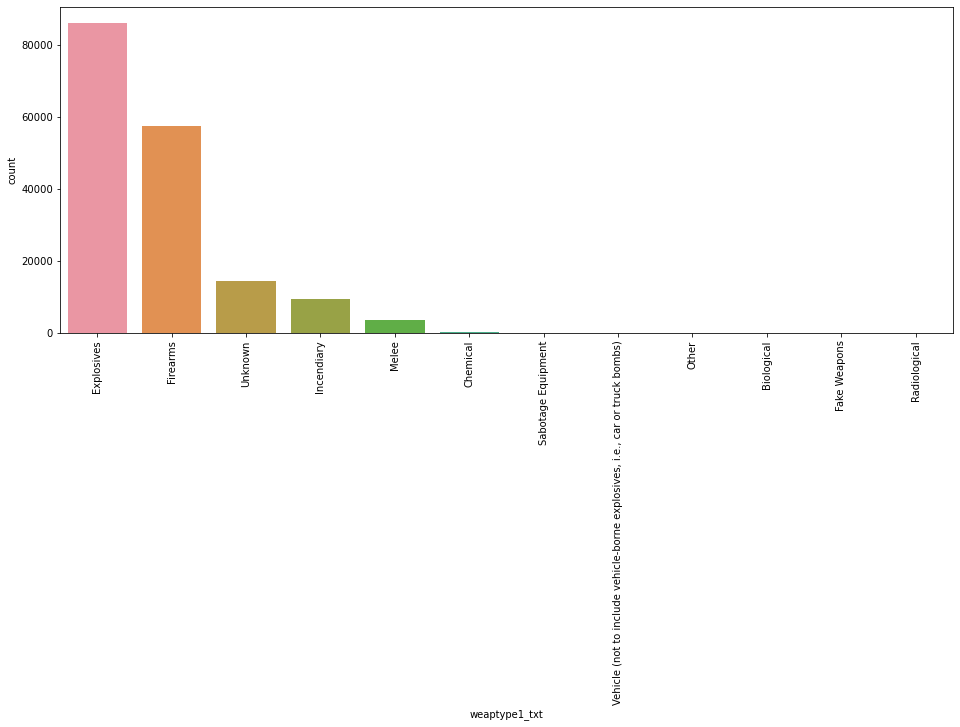

In [147]:
next(myplot);

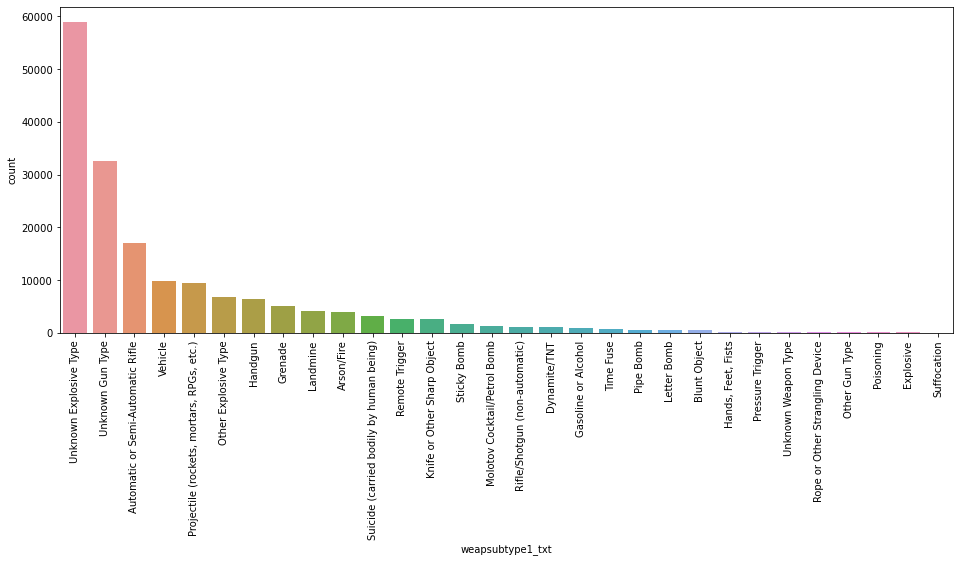

In [148]:
next(myplot);

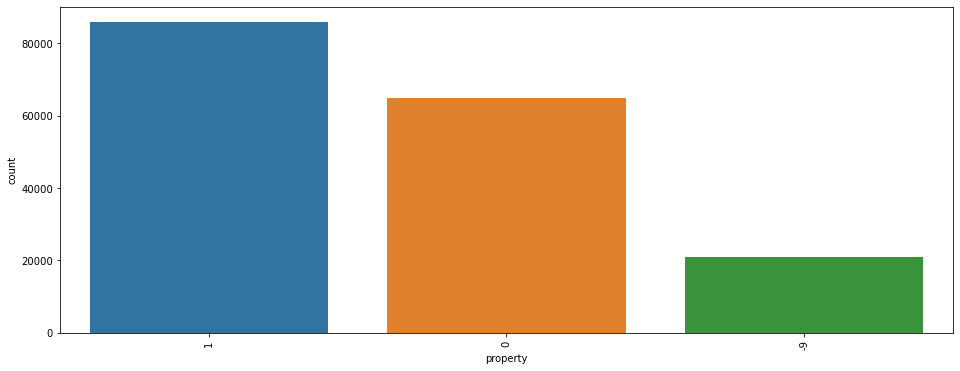

In [149]:
next(myplot);

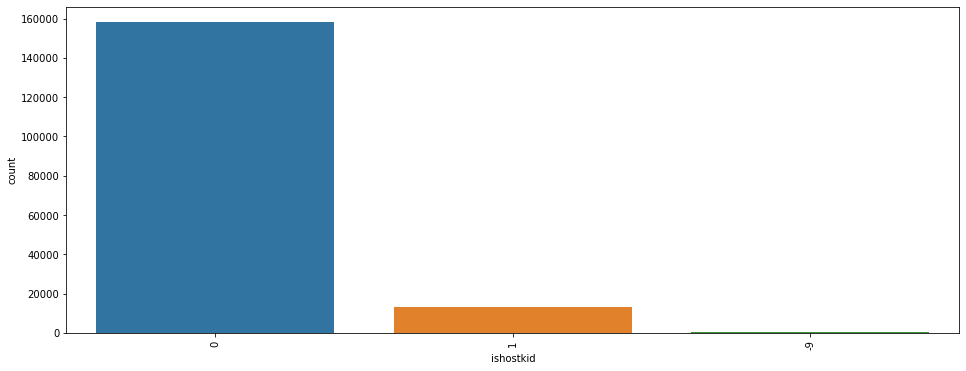

In [150]:
next(myplot);

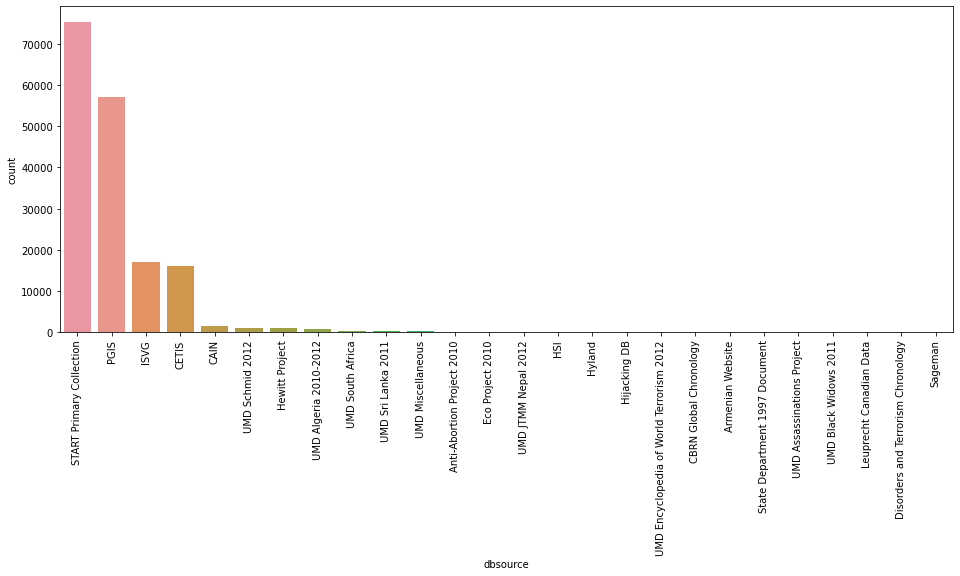

In [151]:
next(myplot);

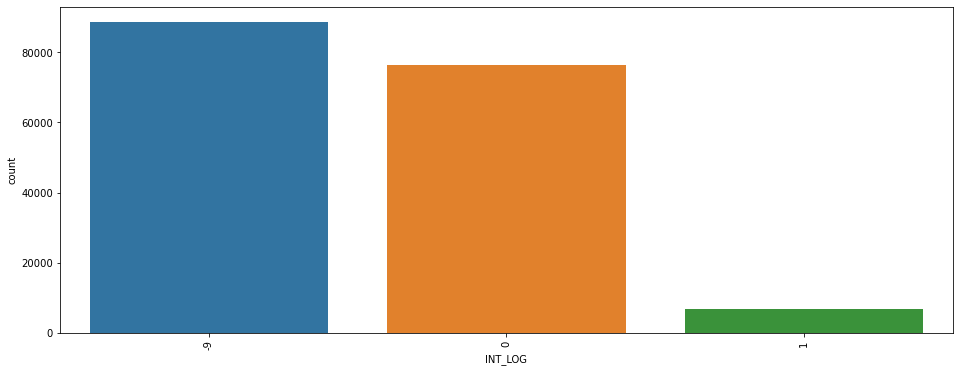

In [152]:
next(myplot);

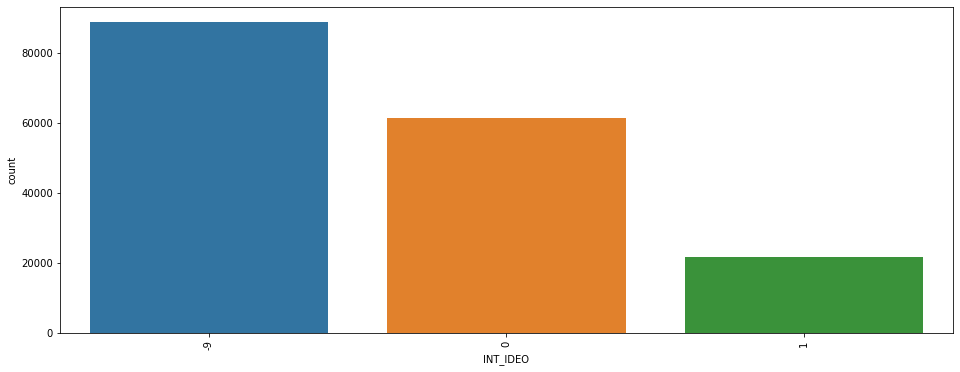

In [153]:
next(myplot);

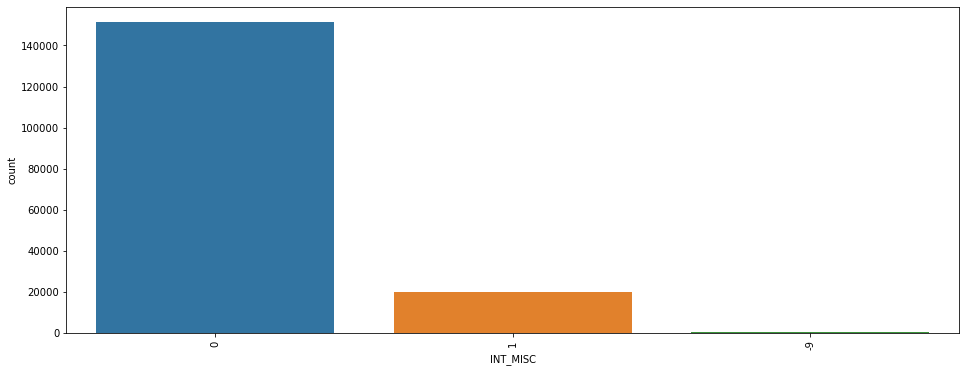

In [154]:
next(myplot);

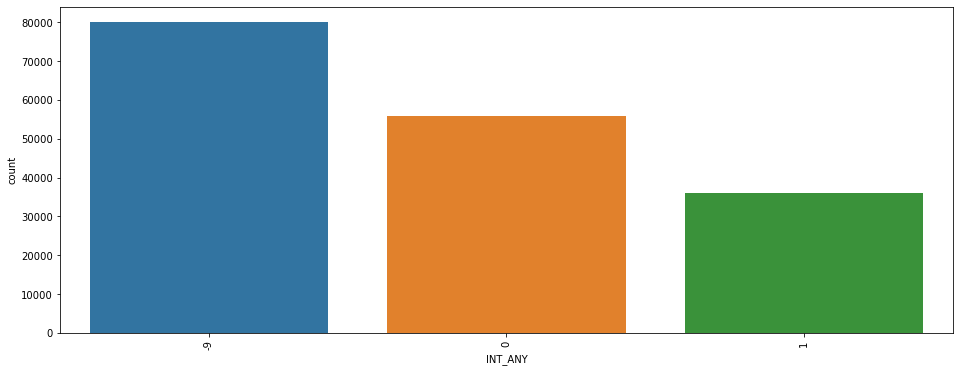

In [155]:
next(myplot);

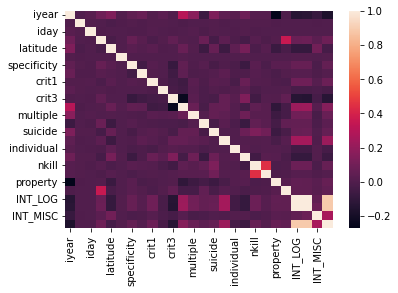

In [12]:
sns.heatmap(data.corr());

<AxesSubplot:xlabel='iyear', ylabel='nkill'>

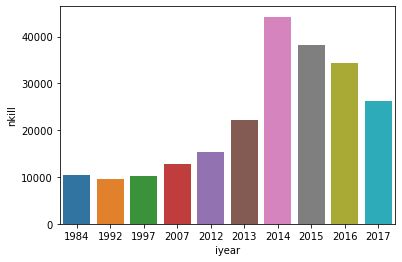

In [22]:
# see the most year that have high killer
top_10_years_kill = data.groupby(['iyear'])['nkill'].sum().reset_index().sort_values('nkill' , ascending = False).head(10)
sns.barplot(data = top_10_years_kill , x = 'iyear' , y = 'nkill')


<AxesSubplot:xlabel='imonth', ylabel='nkill'>

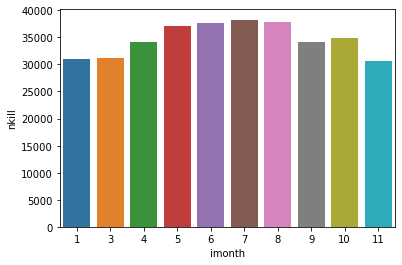

In [23]:
# see the most month that have high killer
top_10_months_kill = data.groupby(['imonth'])['nkill'].sum().reset_index().sort_values('nkill' , ascending = False).head(10)
sns.barplot(data = top_10_months_kill , x = 'imonth' , y = 'nkill')

<AxesSubplot:xlabel='iday', ylabel='nkill'>

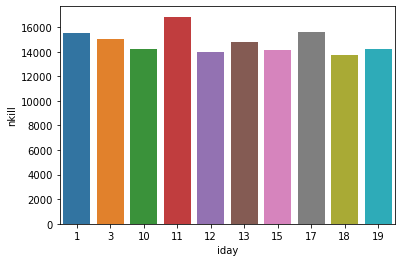

In [26]:
# see the most day that have high killer
top_10_days_kill = data.groupby(['iday'])['nkill'].sum().reset_index().sort_values('nkill' , ascending = False).head(10)
sns.barplot(data = top_10_days_kill , x = 'iday' , y = 'nkill');

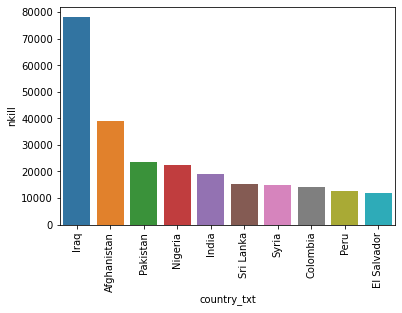

In [29]:
top_10_countries_kill = data.groupby(['country_txt'])['nkill'].sum().reset_index().sort_values('nkill' , ascending = False).head(10)
sns.barplot(data = top_10_countries_kill , x = 'country_txt' , y = 'nkill');
plt.xticks(rotation = 90);

# Hot Zone of terrorism

> **As we see above that most country that have num of kill is iraq**

>**Let's see more about that**

In [35]:
iraq = data[data['country_txt'] == 'Iraq'].groupby(['iyear'])['nkill'].count().to_frame()

In [36]:
iraq.reset_index(inplace = True)
iraq

,iyear,nkill
0,1975,1
1,1976,3
2,1979,2
3,1980,6
4,1981,3
5,1982,5
6,1983,3
7,1984,2
8,1987,3
9,1988,4


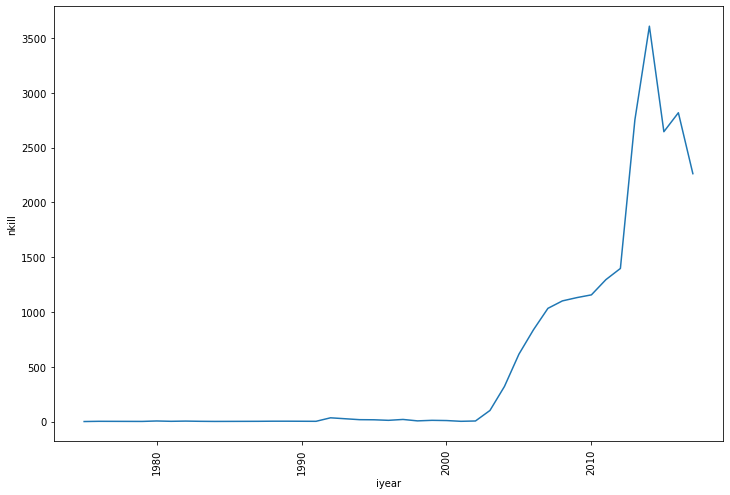

In [37]:
plt.figure(figsize = [12,8])
sns.lineplot(data = iraq , x = 'iyear' , y = 'nkill')
plt.xticks(rotation = 90);

> **the high number of kills in iraq is in 2014**

In [63]:
# i will see the high number of kills last year
data_2017 = data.groupby(['iyear','country_txt'])['nkill'].sum().to_frame()
data_2017.reset_index(inplace = True)
data_2017 = data_2017.sort_values('iyear' , ascending = False)
data_2017 = data_2017[data_2017['iyear'] == 2017]
data_2017[data_2017['country_txt'] == 'Iran']
data_2017 = data_2017.sort_values('nkill' ,ascending = False)
data_2017

,iyear,country_txt,nkill
3698,2017,Iraq,6358
3660,2017,Afghanistan,6061
3745,2017,Syria,2016
3738,2017,Somalia,1898
3725,2017,Nigeria,1804
...,...,...,...
3681,2017,Czech Republic,0
3709,2017,Latvia,0
3711,2017,Liberia,0
3737,2017,Sierra Leone,0


In [64]:
data_2017.head(15)

,iyear,country_txt,nkill
3698,2017,Iraq,6358
3660,2017,Afghanistan,6061
3745,2017,Syria,2016
3738,2017,Somalia,1898
3725,2017,Nigeria,1804
3727,2017,Pakistan,1072
3686,2017,Egypt,862
3759,2017,Yemen,747
3676,2017,Central African Republic,601
3682,2017,Democratic Republic of the Congo,595


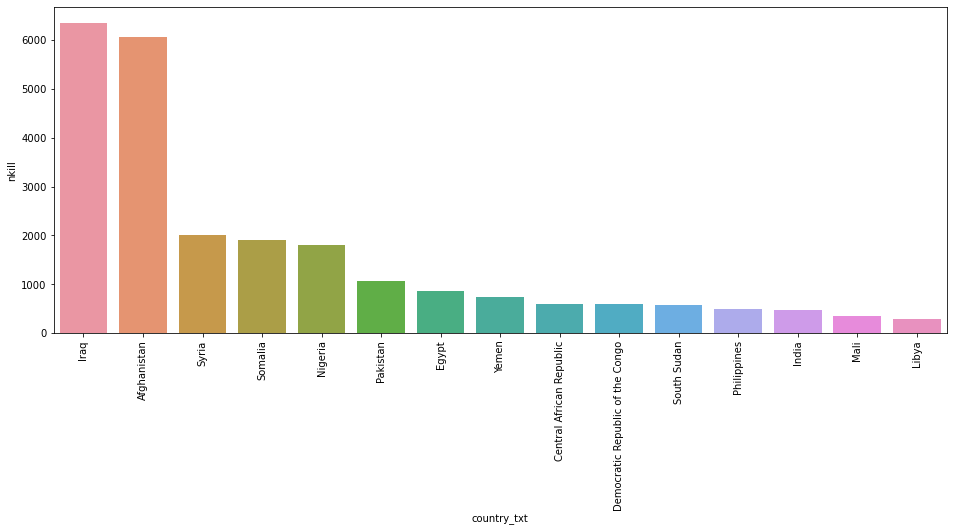

In [66]:
plt.figure(figsize = [16,6])
sns.barplot(data = data_2017.head(15) , x = 'country_txt' , y = 'nkill')
plt.xticks(rotation = 90);

> **In 2017  the high country that have the maximum number of kills is `Iraq` then `Afghanistan`**

> **Let's see more about killing in iraq in all years**

In [67]:
iraq = data[data['country_txt'] == 'Iraq'].groupby(['weaptype1_txt'])['nkill'].sum().to_frame()
iraq = iraq.reset_index()
iraq = iraq.sort_values('nkill' , ascending = False)
iraq

,weaptype1_txt,nkill
1,Explosives,55658
2,Firearms,13300
7,Unknown,8530
3,Incendiary,216
4,Melee,200
0,Chemical,112
5,Other,74
8,Vehicle (not to include vehicle-borne explosiv...,1
6,Sabotage Equipment,0


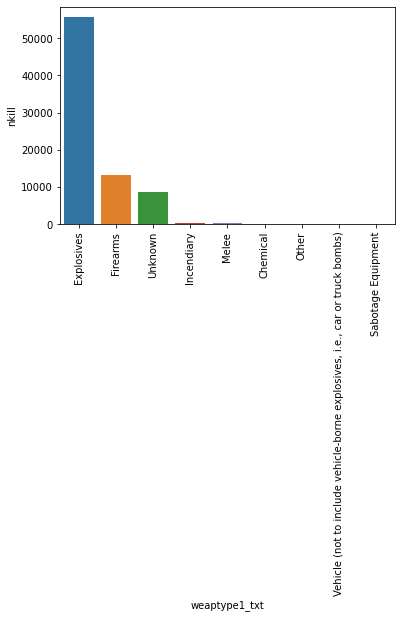

In [68]:
sns.barplot(data = iraq , x = 'weaptype1_txt' , y = 'nkill');
plt.xticks(rotation = 90);

> **Most of dead people are killed by Explosives**

In [69]:
# what about region 
region = data.groupby(['region_txt'])['nkill'].sum().to_frame()
region = region.reset_index()
region = region.sort_values('nkill')
region

,region_txt,nkill
0,Australasia & Oceania,150
2,Central Asia,999
3,East Asia,1137
6,North America,4830
11,Western Europe,6689
4,Eastern Europe,7403
9,Southeast Asia,15525
7,South America,27992
1,Central America & Caribbean,28561
10,Sub-Saharan Africa,77758


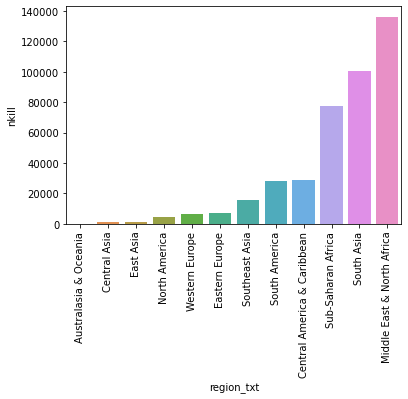

In [71]:
sns.barplot(data = region , x = 'region_txt' , y = 'nkill')
plt.xticks(rotation = 90);

> **As we see by Region that high number of kill in middle East and North Africa**